        sender   receiver  group
0          115          4      1
1          115          7      1
2          115         59      1
3          115        168      1
4          115        232      1
...        ...        ...    ...
69756      229        113  10231
69757      229        188  10231
69758      229        357  10231
69759      229         62  10231
69760      229         48  10231

[69761 rows x 3 columns]
        sender   receiver  group
0          115          4      1
1          115          7      1
2          115         59      1
3          115        168      1
4          115        232      1
...        ...        ...    ...
56167      120        373   8027
56168      120        415   8027
56169      288        425   8028
56170      288        386   8028
56171      288        175   8028

[56172 rows x 3 columns]
        sender   receiver  group
0            4        237      1
1            4        370      1
2            4        238      1
3            4         5

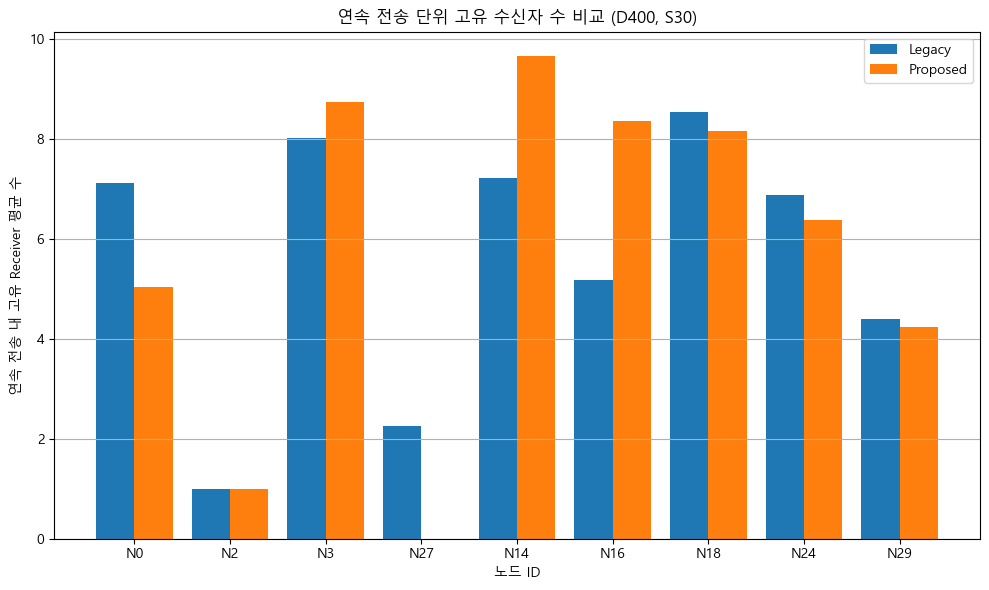

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N27", "N14", "N16", "N18", "N24", "N29"]
methods = ['L', 'P']
result = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        node_id = node[1:]
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_drop_log.csv")
        if not os.path.exists(file_path):
            result[method].append(0)
            continue

        df = pd.read_csv(file_path)

        sender_col = df.columns[3]
        receiver_col = df.columns[4]

        df = df[[sender_col, receiver_col]].copy()
        df['group'] = (df[sender_col] != df[sender_col].shift()).cumsum()
        #print(df)

        group_receiver_counts = df.groupby('group').agg({
            sender_col: 'first',
            receiver_col: lambda x: len(set(x))
        })

        target_sender = int(node_id)
        node_groups = group_receiver_counts[group_receiver_counts[sender_col] == target_sender]

        avg_unique_receivers = node_groups[receiver_col].mean() if not node_groups.empty else 0
        result[method].append(avg_unique_receivers)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar(x, result['L'], width=0.4, label='Legacy', align='center')
plt.bar([i + 0.4 for i in x], result['P'], width=0.4, label='Proposed', align='center')
plt.xticks([i + 0.2 for i in x], nodes)
plt.ylabel("연속 전송 내 고유 Receiver 평균 수")
plt.xlabel("노드 ID")
plt.title(f"연속 전송 단위 고유 수신자 수 비교 ({density}, {speed})")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:26: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_L = pd.read_csv(file_L, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_P = pd.read_csv(file_P, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:26: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_L = pd.read_csv(file_L, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_P = pd.read_csv(file_P, names=columns, header=None)


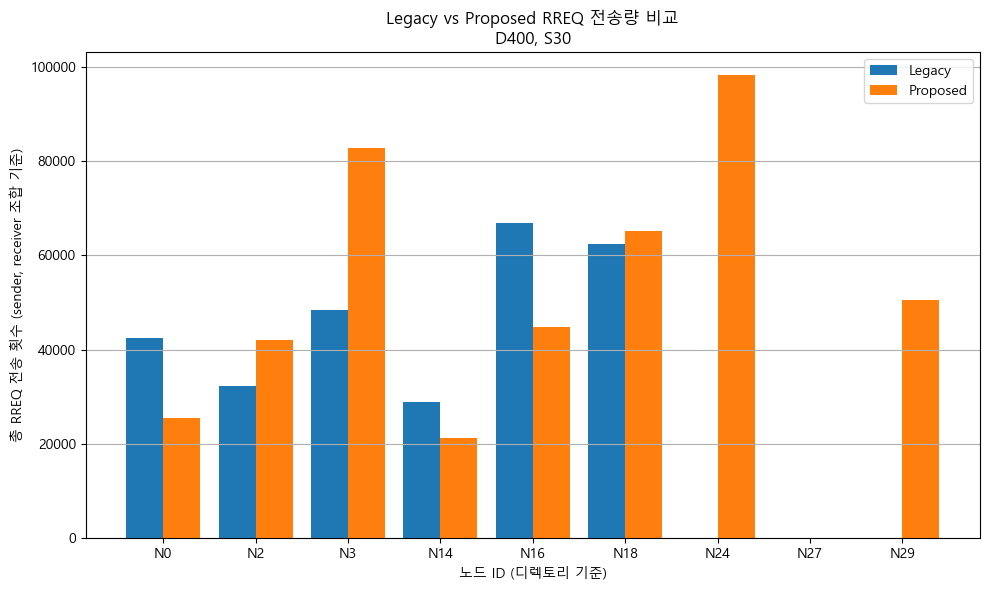

In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 실험 디렉토리 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N27", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'x', 'y', 'z', 'Nearby', 'Total']

# 결과 저장
legacy_counts = []
proposed_counts = []

for node in nodes:
    file_L = os.path.join(base_path, "L", density, speed, node, "sinr_drop_log.csv")
    file_P = os.path.join(base_path, "P", density, speed, node, "sinr_drop_log.csv")

    if not os.path.exists(file_L) or not os.path.exists(file_P):
        legacy_counts.append(0)
        proposed_counts.append(0)
        continue

    # 파일 읽기
    df_L = pd.read_csv(file_L, names=columns, header=None)
    df_P = pd.read_csv(file_P, names=columns, header=None)

    # RREQ만 필터링
    df_L = df_L[df_L['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
    df_P = df_P[df_P['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

    # 송수신자 조합 단위로 count 합계
    legacy_total = df_L.groupby(['sender', 'receiver']).size().sum()
    proposed_total = df_P.groupby(['sender', 'receiver']).size().sum()

    legacy_counts.append(legacy_total)
    proposed_counts.append(proposed_total)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], legacy_counts, width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], proposed_counts, width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("총 RREQ 전송 횟수 (sender, receiver 조합 기준)")
plt.xlabel("노드 ID (디렉토리 기준)")
plt.title(f"Legacy vs Proposed RREQ 전송량 비교\n{density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

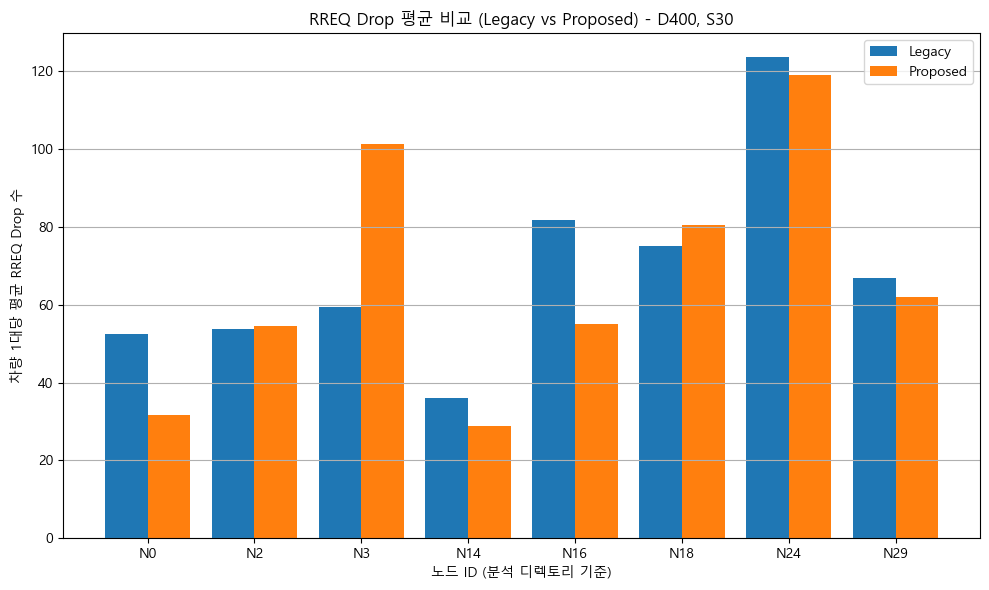

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

        df['Success'] = df['Success'].astype(str)
        senders = df['sender'].unique()
        drops = df[df['Success'] == "False"]
        avg_drop = len(drops) / len(senders) if len(senders) > 0 else 0
        results[method].append(avg_drop)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("차량 1대당 평균 RREQ Drop 수")
plt.xlabel("노드 ID (분석 디렉토리 기준)")
plt.title(f"RREQ Drop 평균 비교 (Legacy vs Proposed) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

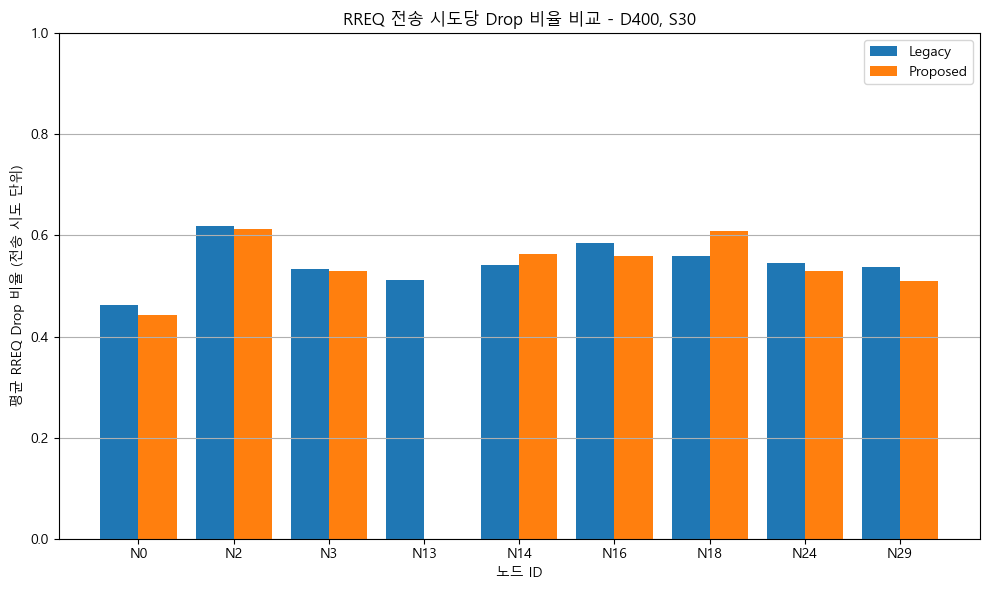

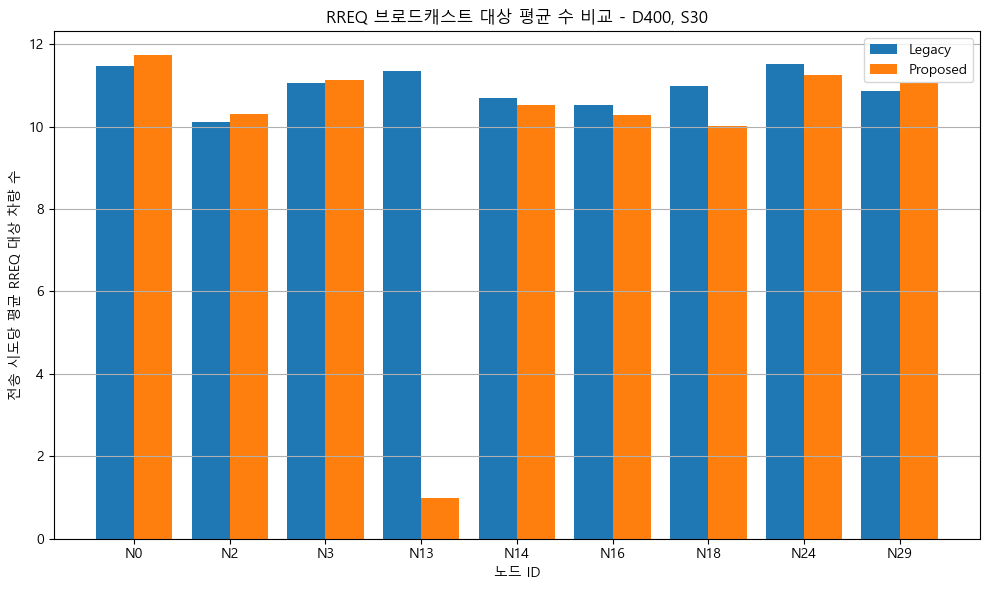

In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_drop_rate = {'L': [], 'P': []}
results_avg_receivers = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_drop_rate[method].append(0)
            results_avg_receivers[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)

        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()

        group_drop_rate = df.groupby('group').apply(
            lambda g: (g['Success'] == 'False').sum() / len(g) if len(g) > 0 else 0
        )
        avg_drop_rate = group_drop_rate.mean() if not group_drop_rate.empty else 0
        results_drop_rate[method].append(avg_drop_rate)

        group_receivers = df.groupby('group')['receiver'].agg(lambda x: len(set(x)))
        avg_receivers = group_receivers.mean() if not group_receivers.empty else 0
        results_avg_receivers[method].append(avg_receivers)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_drop_rate['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_drop_rate['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 RREQ Drop 비율 (전송 시도 단위)")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 시도당 Drop 비율 비교 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_avg_receivers['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_avg_receivers['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("전송 시도당 평균 RREQ 대상 차량 수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 브로드캐스트 대상 평균 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

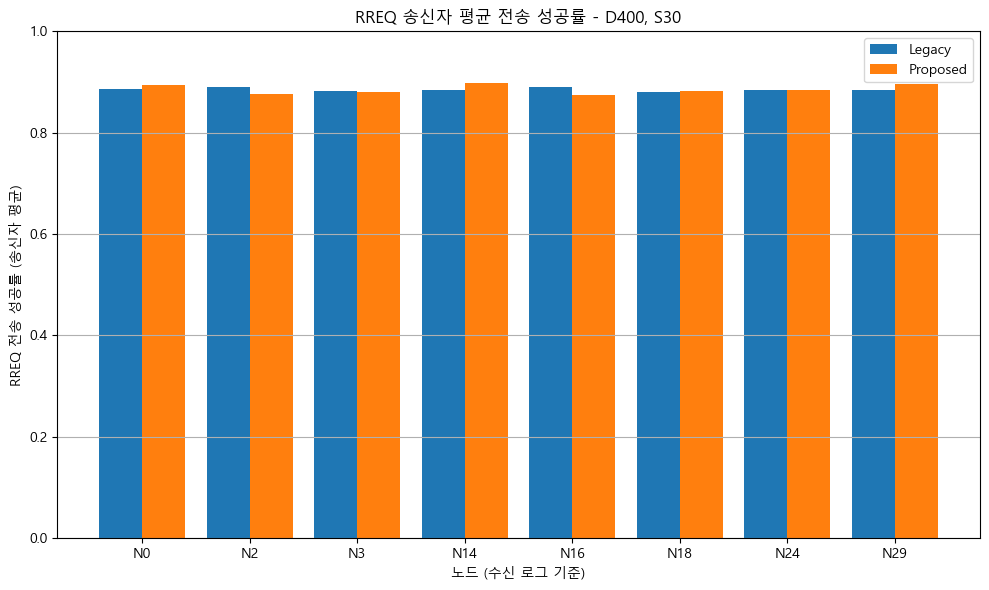

In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rreq_success_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rreq_success_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        # 그룹: sender + time + packet
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)
        grouped = df.groupby('group')

        # sender 기준 성공률 계산
        sender_stats = {}
        for group_id, group in grouped:
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [success, total]
            sender_stats[sender][1] += 1
            if (group['Success'] == 'True').any():
                sender_stats[sender][0] += 1

        sender_ratios = [succ / total for succ, total in sender_stats.values() if total > 0]
        mean_success_ratio = sum(sender_ratios) / len(sender_ratios) if sender_ratios else 0
        results_mean_rreq_success_ratio[method].append(mean_success_ratio)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rreq_success_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rreq_success_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공률 (송신자 평균)")
plt.xlabel("노드 (수신 로그 기준)")
plt.title(f"RREQ 송신자 평균 전송 성공률 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

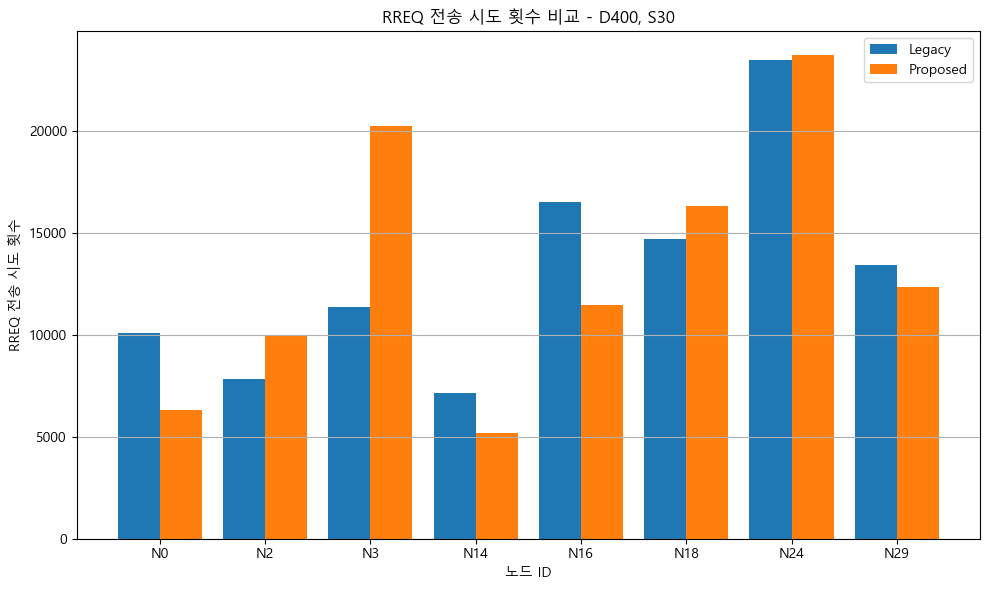

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rreq_attempts = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rreq_attempts[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()
        rreq_attempt_count = df['group'].nunique()
        results_rreq_attempts[method].append(rreq_attempt_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rreq_attempts['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rreq_attempts['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 시도 횟수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 시도 횟수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

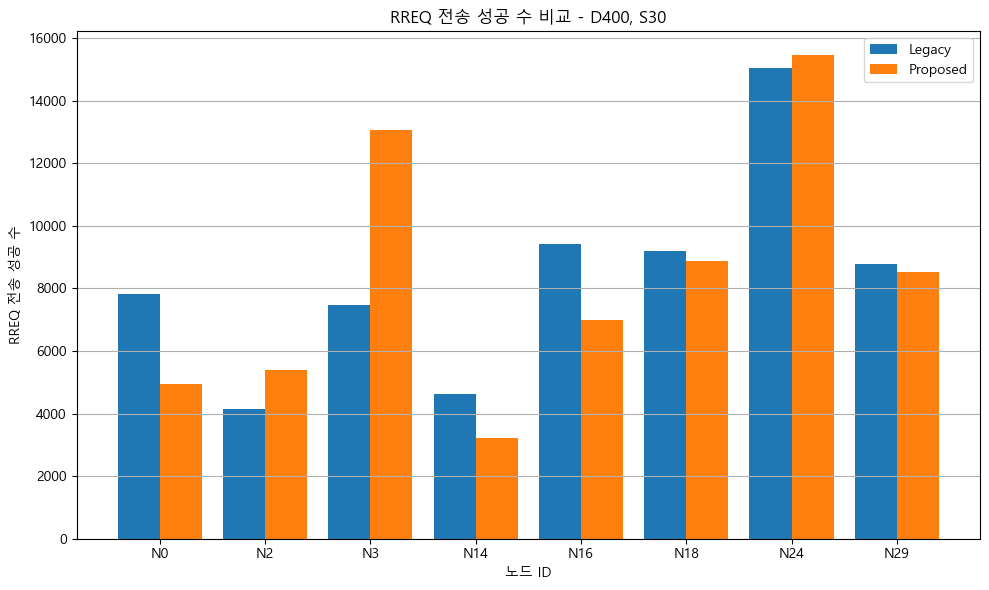

In [43]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rreq_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rreq_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()

        group_success = df.groupby('group')['Success'].apply(lambda x: (x == 'True').any())
        success_count = group_success.sum()
        results_rreq_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rreq_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rreq_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

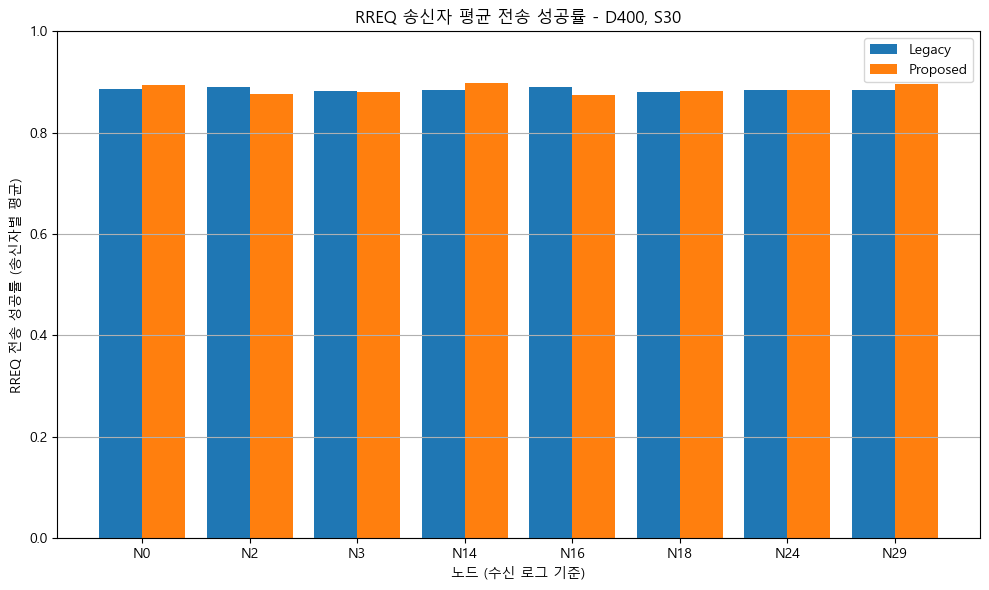

In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rreq_success_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rreq_success_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')

        # 송신자별 전송 시도 수, 성공 수 개별 카운트
        sender_stats = {}
        for group_id, group in grouped:
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [success_count, total_count]
            sender_stats[sender][1] += 1  # 전송 시도 수
            if (group['Success'] == 'True').any():
                sender_stats[sender][0] += 1  # 성공 수

        # 송신자별 성공률 평균
        sender_success_ratios = [
            success / total for success, total in sender_stats.values() if total > 0
        ]
        mean_success_ratio = (
            sum(sender_success_ratios) / len(sender_success_ratios)
            if sender_success_ratios else 0
        )
        results_mean_rreq_success_ratio[method].append(mean_success_ratio)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rreq_success_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rreq_success_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공률 (송신자별 평균)")
plt.xlabel("노드 (수신 로그 기준)")
plt.title(f"RREQ 송신자 평균 전송 성공률 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

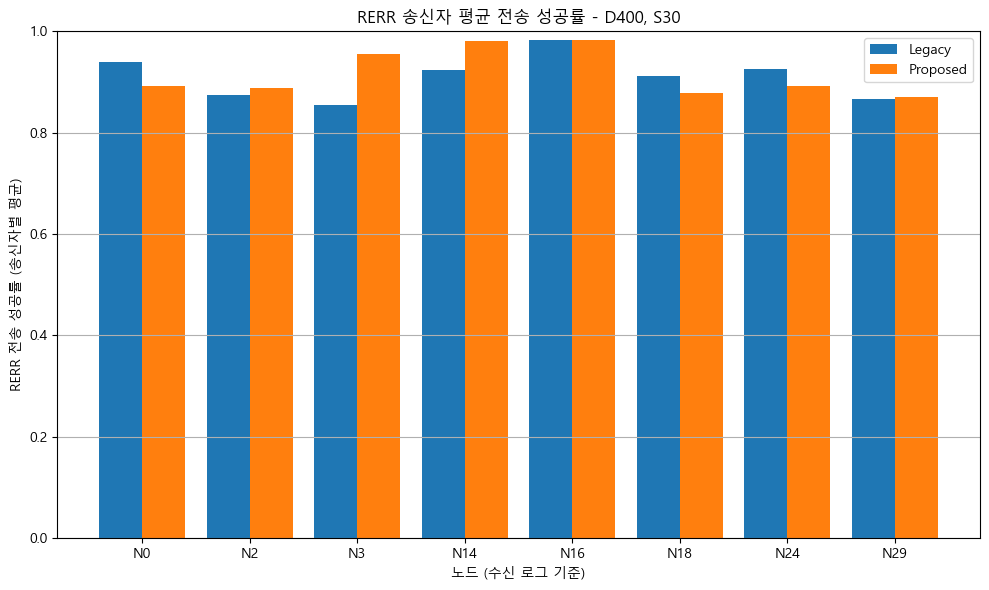

In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rerr_success_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rerr_success_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')

        sender_stats = {}
        for group_id, group in grouped:
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [success_count, total_count]
            sender_stats[sender][1] += 1  # 전송 시도 수
            if (group['Success'] == 'True').any():
                sender_stats[sender][0] += 1  # 성공 수

        sender_success_ratios = [
            success / total for success, total in sender_stats.values() if total > 0
        ]
        mean_success_ratio = (
            sum(sender_success_ratios) / len(sender_success_ratios)
            if sender_success_ratios else 0
        )
        results_mean_rerr_success_ratio[method].append(mean_success_ratio)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rerr_success_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rerr_success_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RERR 전송 성공률 (송신자별 평균)")
plt.xlabel("노드 (수신 로그 기준)")
plt.title(f"RERR 송신자 평균 전송 성공률 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

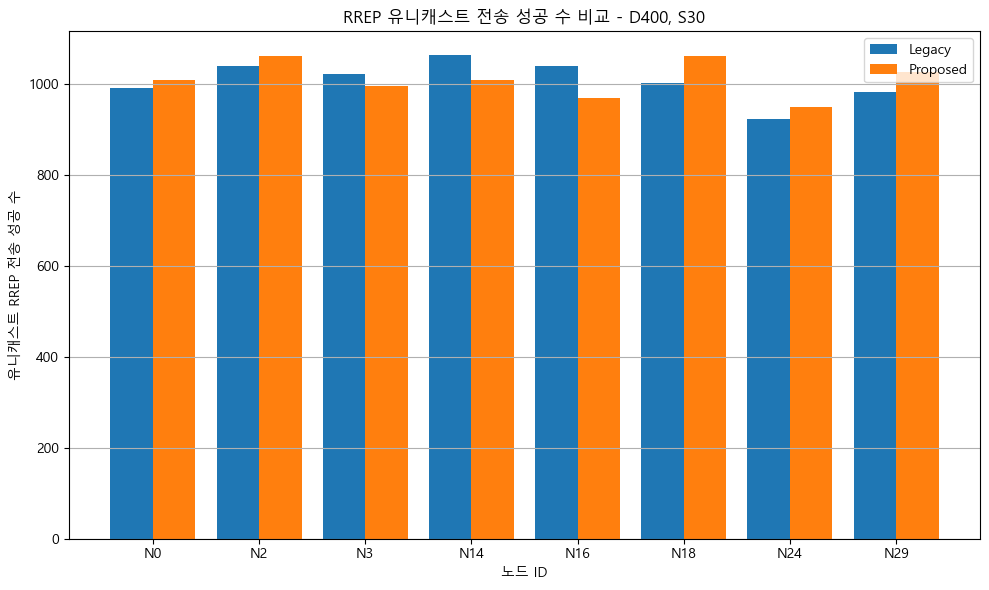

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_unicast_rrep_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_unicast_rrep_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rrep", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')
        is_unicast = grouped['receiver'].nunique() == 1

        unicast_groups = is_unicast[is_unicast].index
        unicast_success_flags = grouped['Success'].apply(lambda x: (x == 'True').any())
        success_count = unicast_success_flags[unicast_success_flags.index.isin(unicast_groups)].sum()

        results_unicast_rrep_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_unicast_rrep_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_unicast_rrep_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("유니캐스트 RREP 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RREP 유니캐스트 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2977726333.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2977726333.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2977726333.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2977726333.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

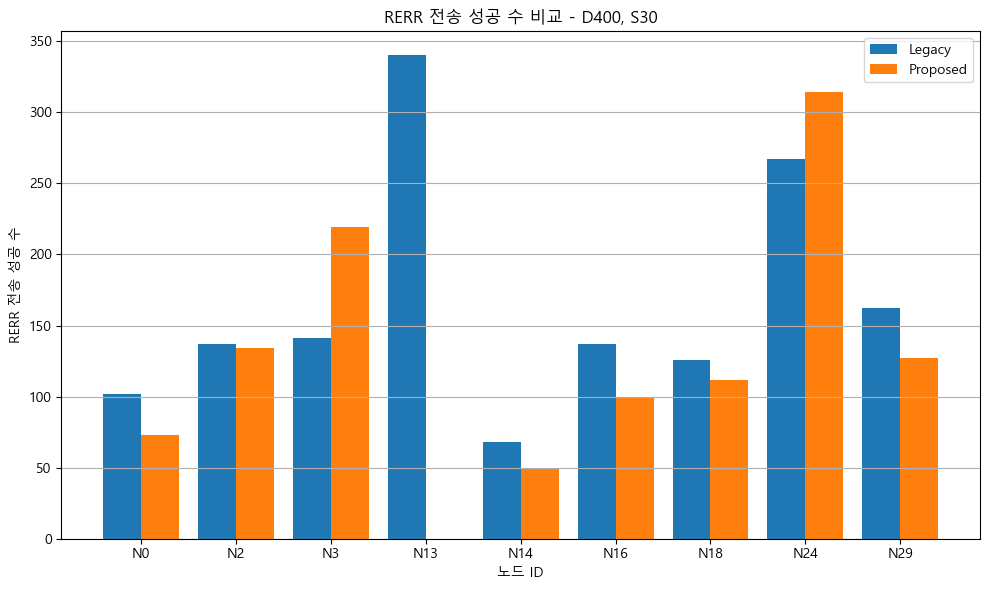

In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')
        success_flags = grouped['Success'].apply(lambda x: (x == 'True').any())
        success_count = success_flags.sum()

        results_rerr_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RERR 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RERR 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2476367120.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2476367120.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2476367120.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2476367120.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

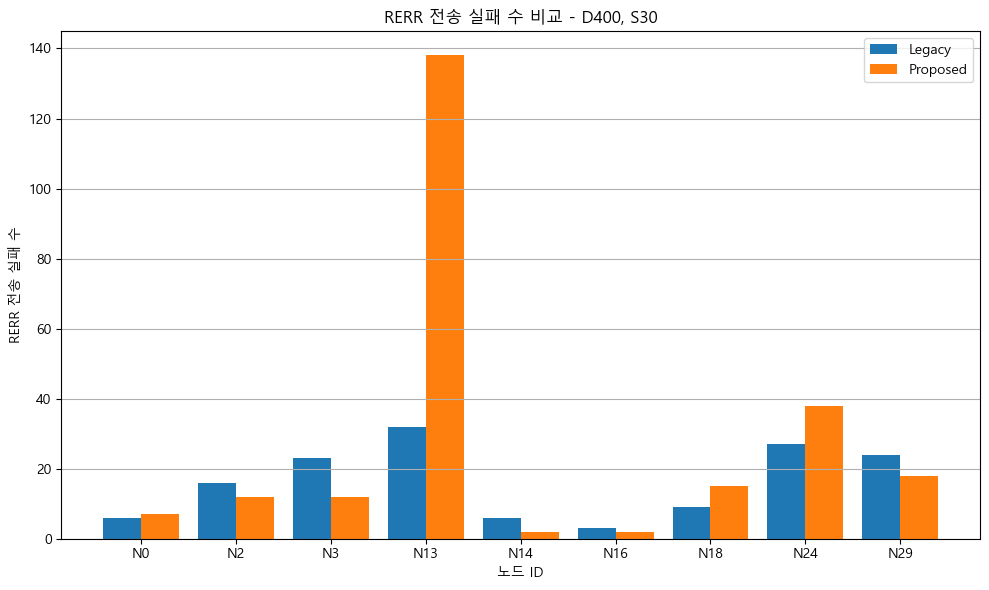

In [58]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_fail = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_fail[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')
        fail_flags = grouped['Success'].apply(lambda x: (x == 'True').sum() == 0)
        fail_count = fail_flags.sum()

        results_rerr_fail[method].append(fail_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_fail['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_fail['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RERR 전송 실패 수")
plt.xlabel("노드 ID")
plt.title(f"RERR 전송 실패 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

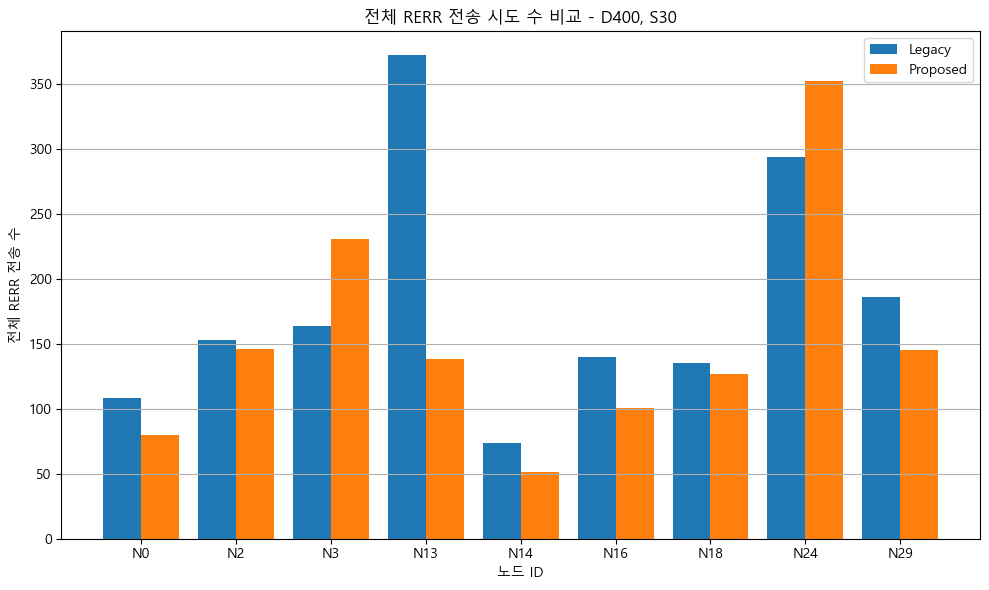

In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_total = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_total[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        total_rerr = df['group'].nunique()
        results_rerr_total[method].append(total_rerr)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_total['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_total['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("전체 RERR 전송 수")
plt.xlabel("노드 ID")
plt.title(f"전체 RERR 전송 시도 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

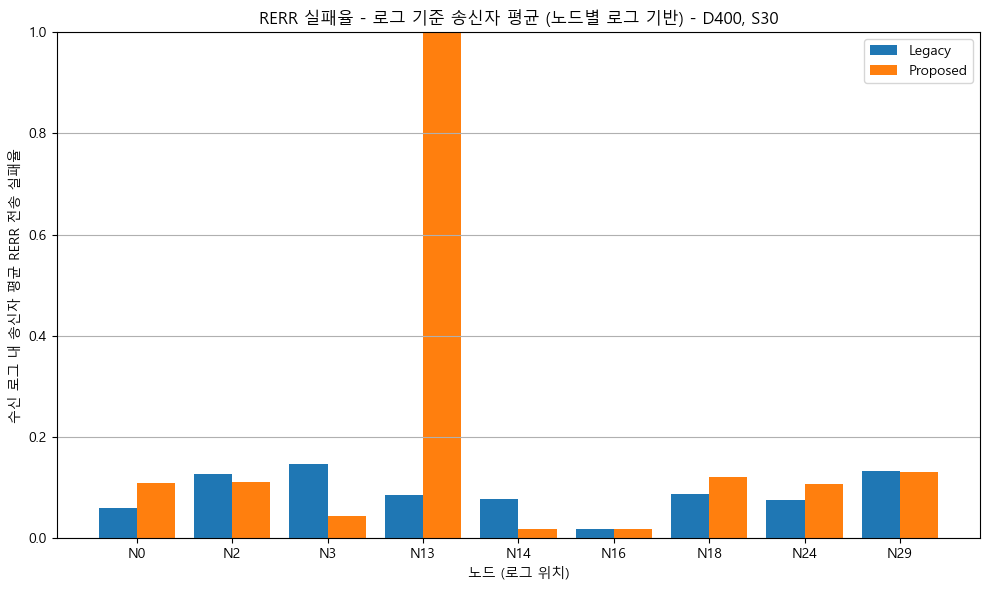

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rerr_fail_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rerr_fail_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)

        sender_stats = {}
        for group_id, group in df.groupby('group'):
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [fail, total]
            sender_stats[sender][1] += 1
            if (group['Success'] == 'True').sum() == 0:
                sender_stats[sender][0] += 1

        sender_ratios = [fail / total for fail, total in sender_stats.values() if total > 0]
        mean_fail_ratio = sum(sender_ratios) / len(sender_ratios) if sender_ratios else 0
        results_mean_rerr_fail_ratio[method].append(mean_fail_ratio)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rerr_fail_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rerr_fail_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("수신 로그 내 송신자 평균 RERR 전송 실패율")
plt.xlabel("노드 (로그 위치)")
plt.title(f"RERR 실패율 - 로그 기준 송신자 평균 (노드별 로그 기반) - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03/analysis_results"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rreq_success_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rreq_success_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, header=0, usecols=columns, dtype=str)
        df = df[df['Packet'].str.contains("Rreq", case=False, na=False)].copy()
        df['Success'] = df['Success'].str.lower() == 'true'
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce').round(6)
        df = df.dropna(subset=['Time', 'sender'])

        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender']
        grouped = df.groupby('group')

        sender_stats = {}
        for group_id, group in grouped:
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]
            sender_stats[sender][1] += 1
            if group['Success'].any():
                sender_stats[sender][0] += 1

        ratios = [succ / total for succ, total in sender_stats.values() if total > 0]
        mean_ratio = sum(ratios) / len(ratios) if ratios else 0
        results_mean_rreq_success_ratio[method].append(mean_ratio)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rreq_success_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rreq_success_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공률 (송신자 기준 평균)")
plt.xlabel("노드 (수신 로그 기준)")
plt.title("RREQ 전송 성공률 비교 (Legacy vs Proposed)")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


ValueError: Usecols do not match columns, columns expected but not found: ['SINR', 'Success', 'Packet', 'sender', 'receiver']